In [1]:
#Module8-NAIVE BAYES ASSIGNMENT

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

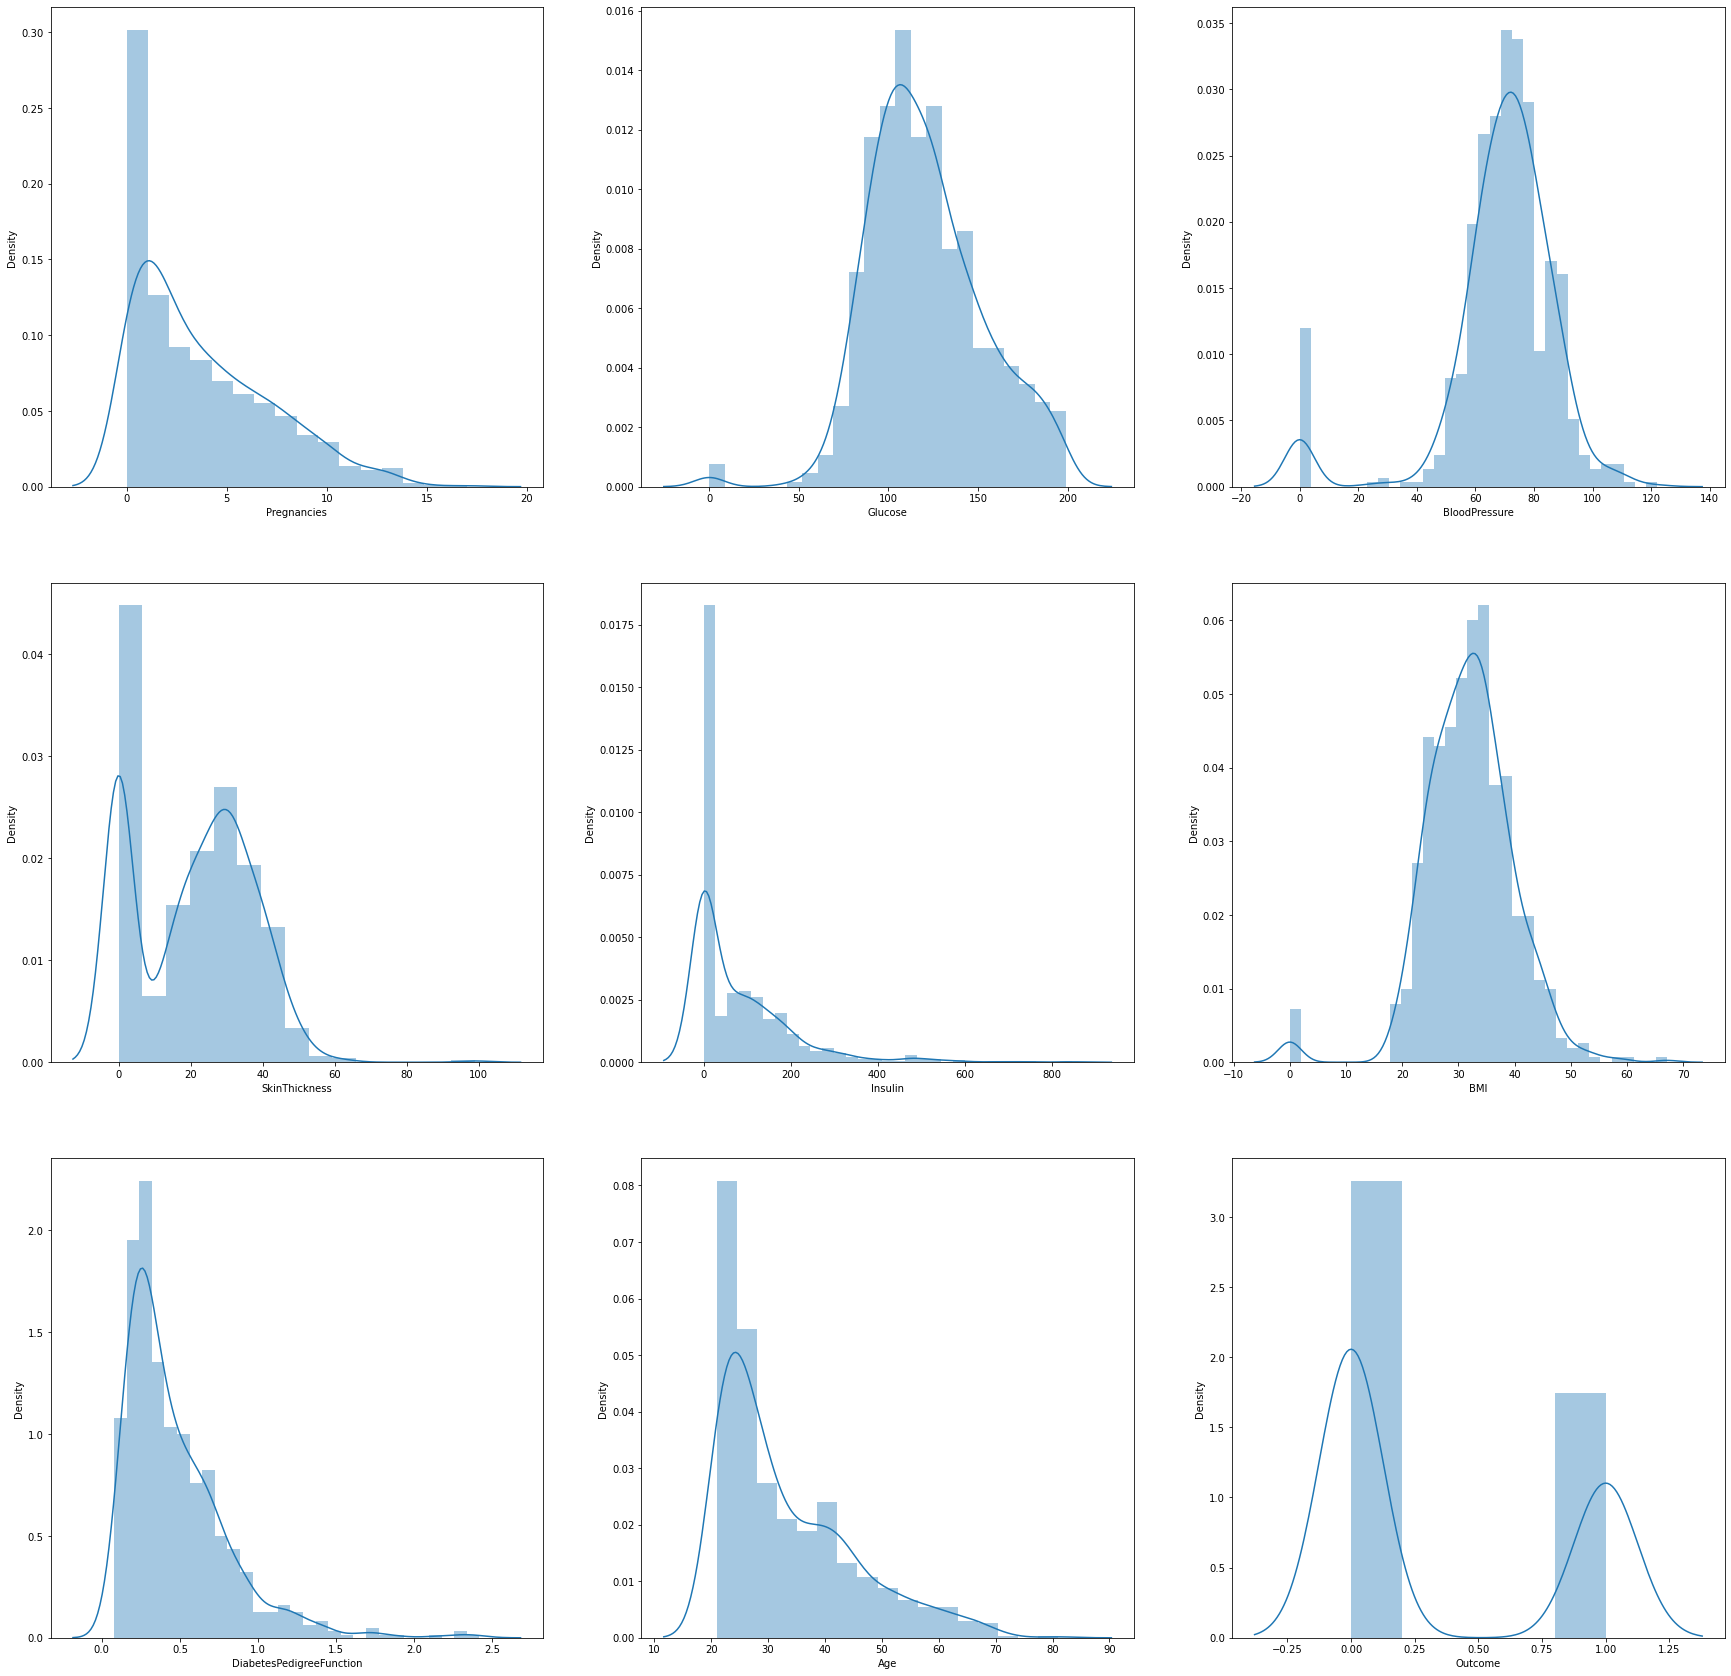

In [7]:
#Checking for Symmetry

fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()  #the plots should be in similar axes
index=0

for i in df.columns:
    sns.distplot(df[i], ax=axes[index])
    index= index+1
plt.show()

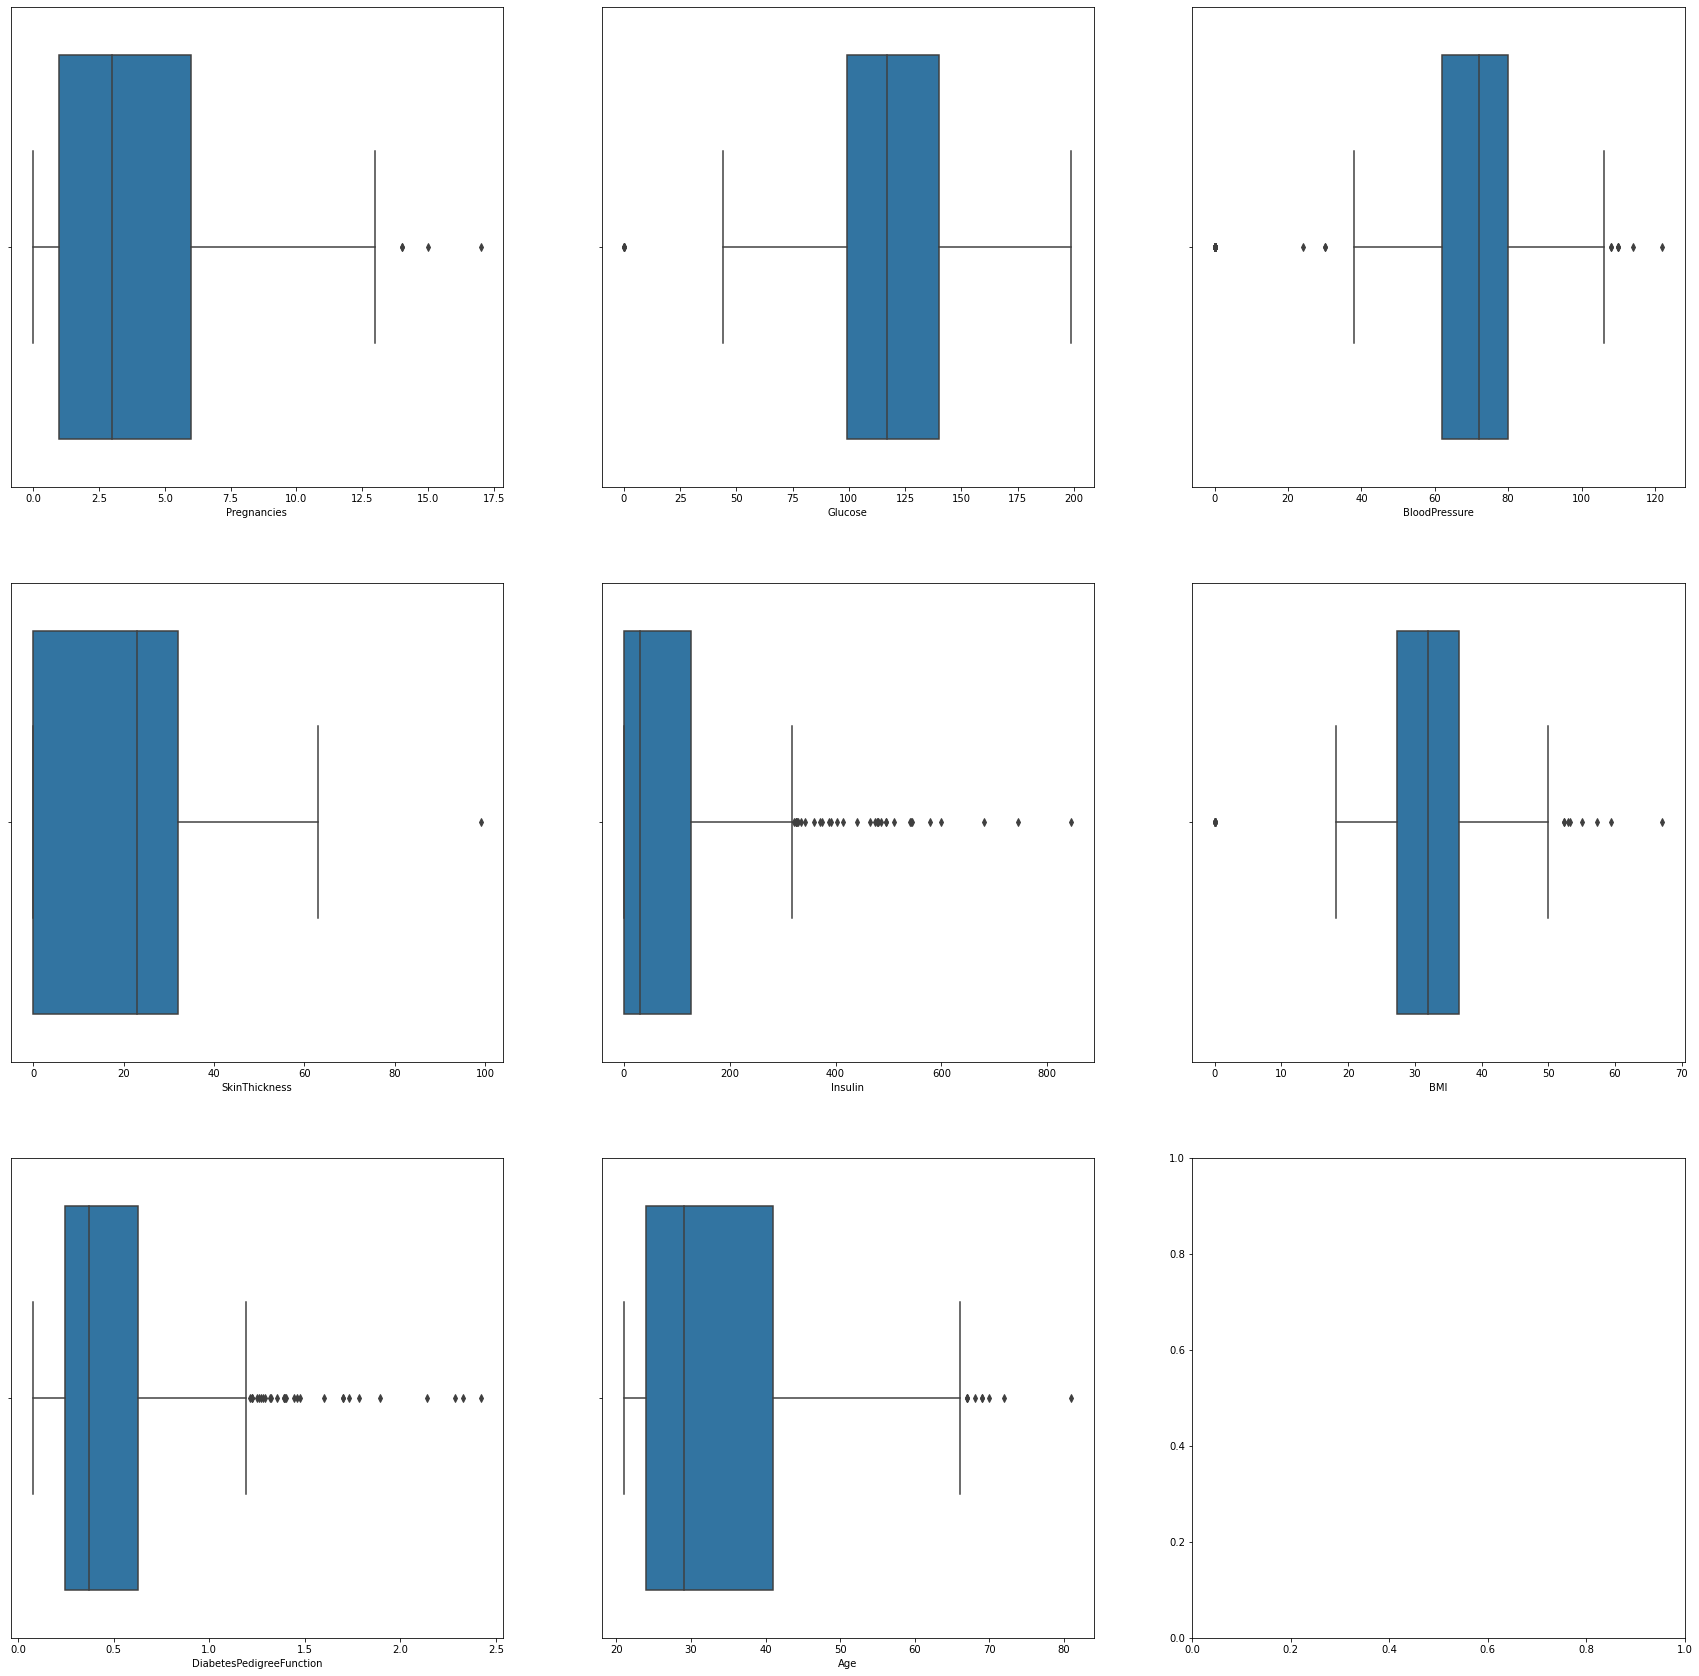

In [8]:
#Checking for Symmetry

fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    if(i!='Outcome'):
        sns.boxplot(x=df[i],ax=axes[index])
        index= index+1
plt.show()

In [9]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
iqr

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [10]:
df= df[~((df < (q1-1.5*iqr)) | (df > (q3+1.5*iqr))).any(axis=1) ]

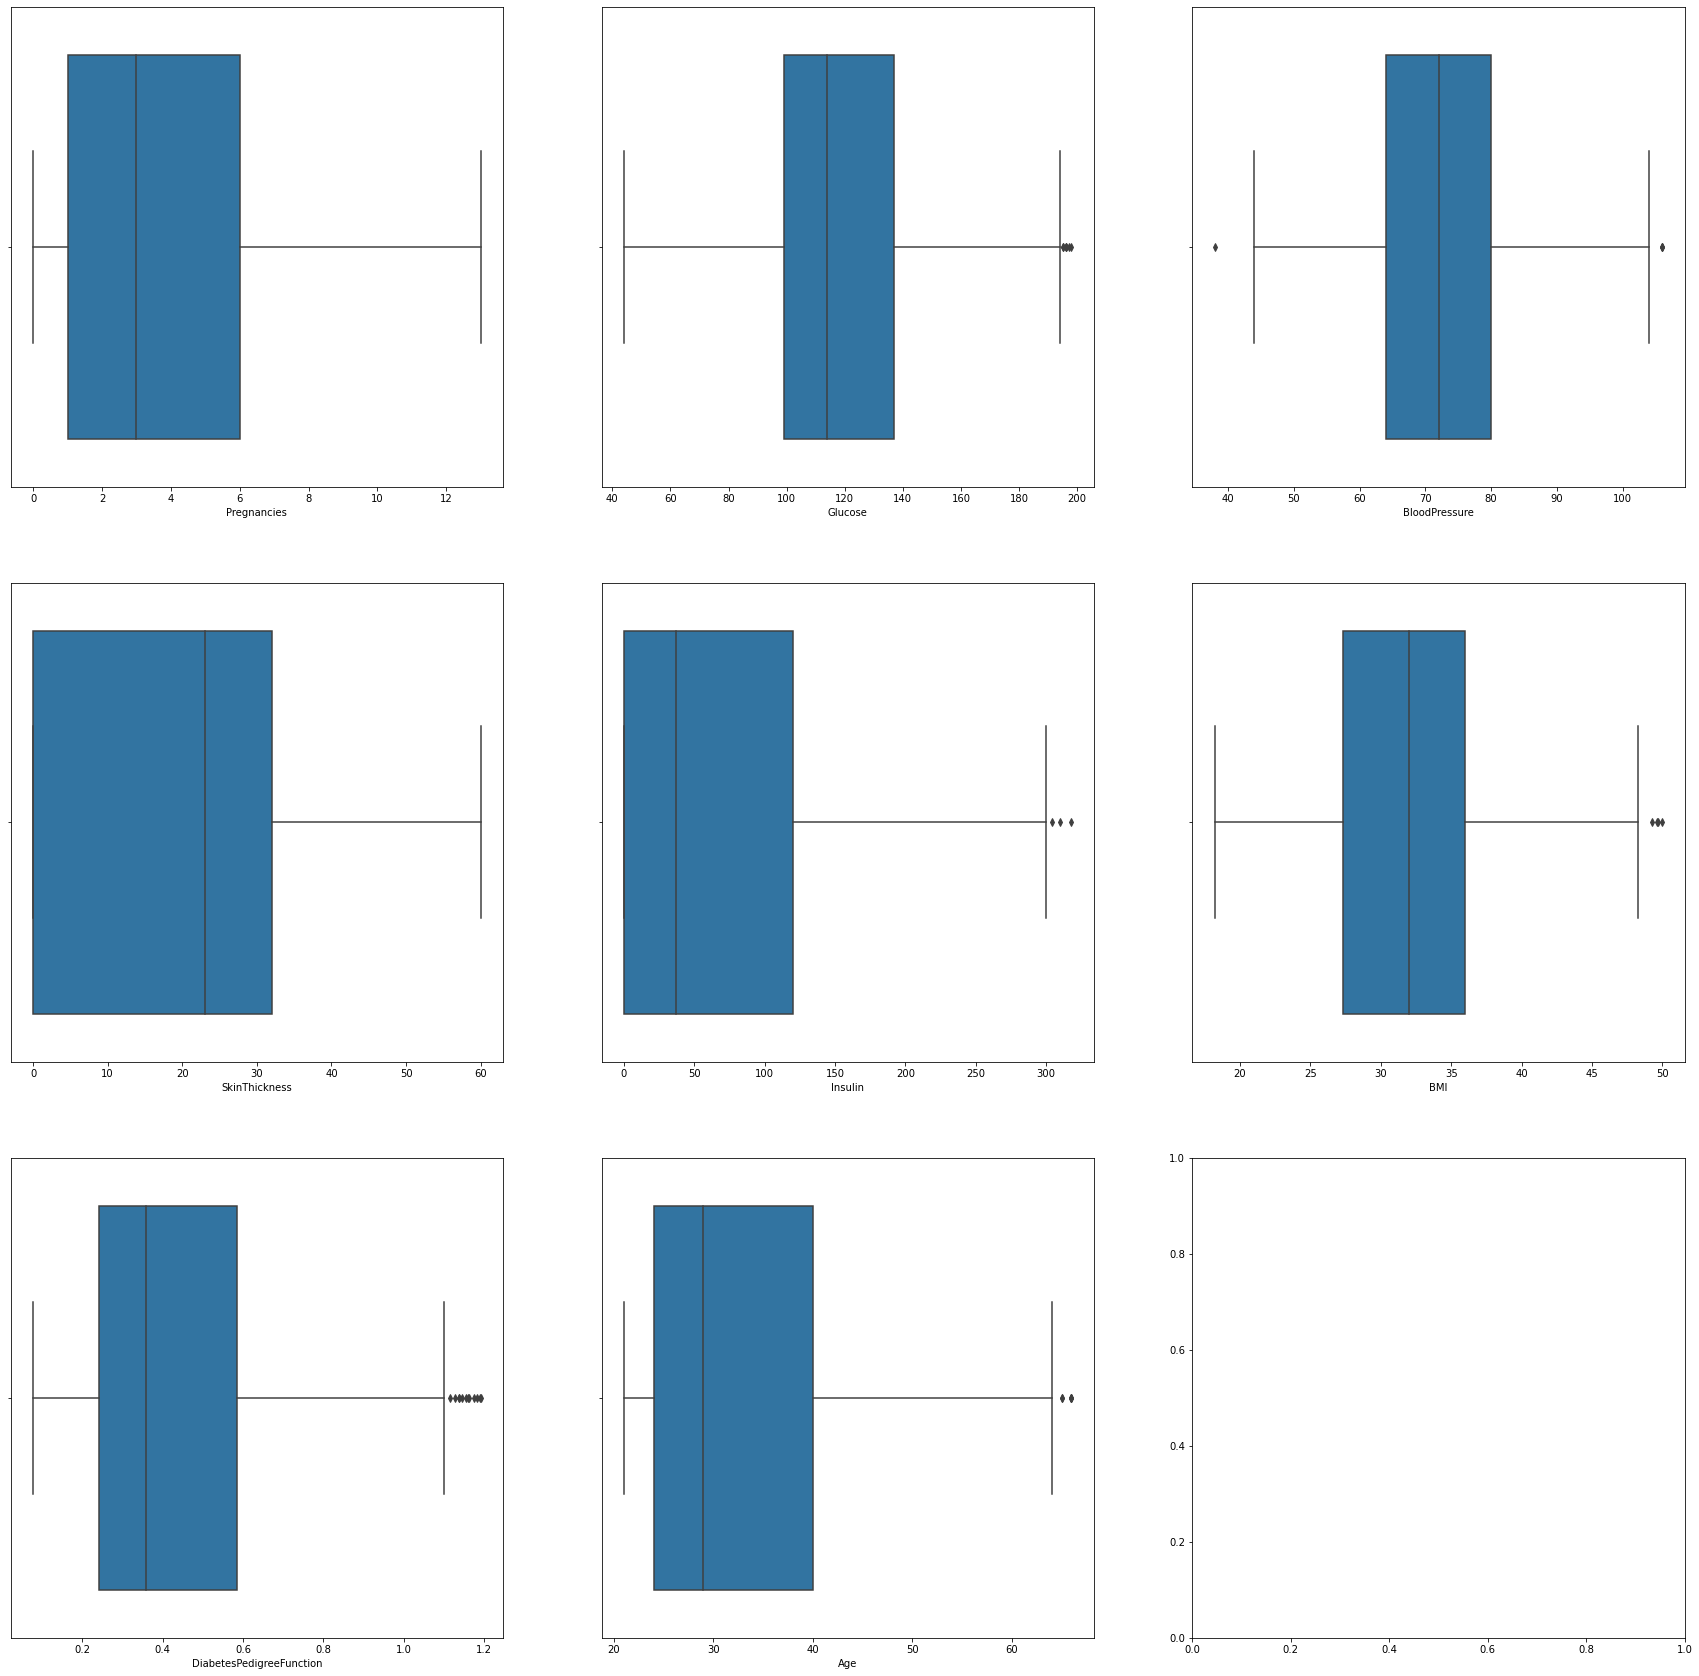

In [11]:
#Checking for Symmetry

fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    if(i!='Outcome'):
        sns.boxplot(x=df[i],ax=axes[index])
        index= index+1
plt.show()

<AxesSubplot:>

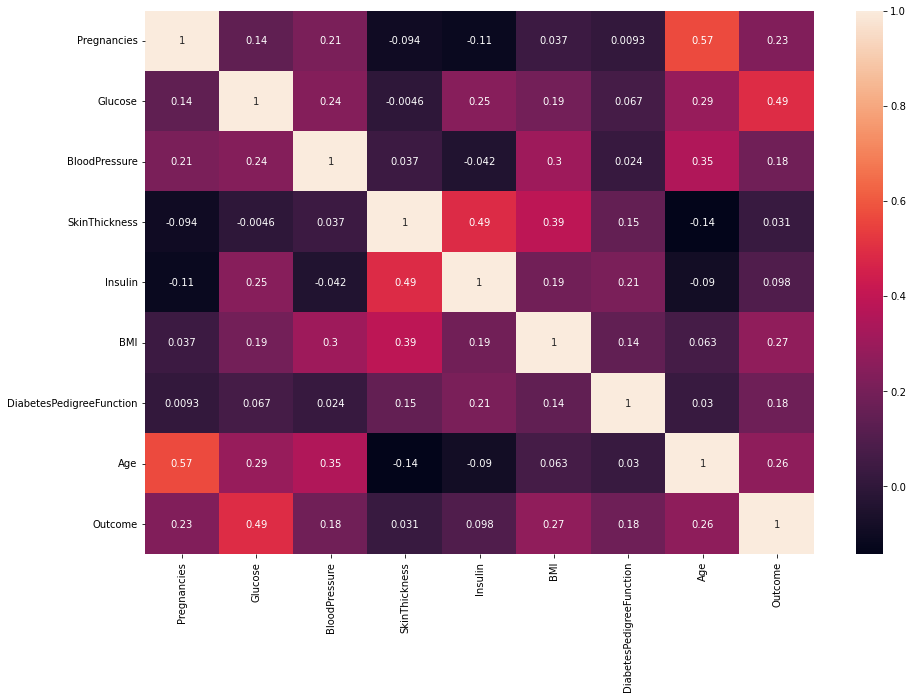

In [12]:
fig=plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")


In [13]:
#multicolinearity:one values is affecting the other 

In [14]:
#checking for multi colinaroty
col_list=[]
for i in df.columns:
    if (i!='outcome'):
        col_list=np.append(col_list,i)
    
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df[col_list]
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF
0,Pregnancies,3.560003
1,Glucose,23.640378
2,BloodPressure,39.804923
3,SkinThickness,4.431872
4,Insulin,2.557022
5,BMI,31.094937
6,DiabetesPedigreeFunction,4.143076
7,Age,16.595196
8,Outcome,1.885315


In [15]:
df=df.reset_index(drop=True)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63,0
635,2,122,70,27,0,36.8,0.340,27,0
636,5,121,72,23,112,26.2,0.245,30,0
637,1,126,60,0,0,30.1,0.349,47,1


In [17]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [20]:
x_train

array([[ 2.20460258,  0.80043237,  1.93048224, ...,  0.75063042,
        -0.6941379 ,  1.66065334],
       [-0.24373867,  0.29152861,  0.54523001, ..., -1.66584708,
        -0.63776222,  2.0215684 ],
       [ 1.89855993,  1.64860531,  0.19891695, ...,  0.96889291,
         0.44545612,  0.12676435],
       ...,
       [-0.85582398,  0.80043237,  1.0646996 , ...,  1.65486072,
         2.61591965, -0.95598082],
       [ 0.98043196,  1.37718997, -1.53264834, ..., -0.2003704 ,
         0.65082466,  0.57790817],
       [-0.85582398,  1.07184771, -1.01317875, ..., -0.88633821,
        -0.99615045, -0.95598082]])

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [23]:
y_pred=gnb.predict(x_test)

In [24]:
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.75
[[110  20]
 [ 28  34]]


In [26]:
#tp fp
#tn fn

# Final Naive Bayes model


In [32]:
#checking for multi colinaroty
col_list=[]
for i in df.columns:
    if (i!='outcome'):
        col_list=np.append(col_list,i)
    
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df[col_list]
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF
0,Pregnancies,3.559786
1,Glucose,19.922232
2,SkinThickness,4.426701
3,Insulin,2.498700
4,BMI,21.247756
5,DiabetesPedigreeFunction,4.106227
6,Age,14.582966
7,Outcome,1.769345


In [33]:
df.drop('BMI',axis=1,inplace=True)

In [34]:
#checking for multi colinaroty
col_list=[]
for i in df.columns:
    if (i!='outcome'):
        col_list=np.append(col_list,i)
    
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df[col_list]
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF
0,Pregnancies,3.552760
1,Glucose,13.044487
2,SkinThickness,3.372048
3,Insulin,2.423153
4,DiabetesPedigreeFunction,3.883176
5,Age,13.597716
6,Outcome,1.754295


In [35]:
df.drop('Age',axis=1,inplace=True)

In [36]:
#checking for multi colinaroty
col_list=[]
for i in df.columns:
    if (i!='outcome'):
        col_list=np.append(col_list,i)
    
from statsmodels.stats.outliers_influence import variance_inflation_factor

x=df[col_list]
vif=pd.DataFrame()
vif['features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,features,VIF
0,Pregnancies,2.479548
1,Glucose,6.344850
2,SkinThickness,3.363643
3,Insulin,2.372775
4,DiabetesPedigreeFunction,3.787480
5,Outcome,1.736300


In [ ]:
x=df(df['Pregnancies','Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction'])
y=df['Outcome']

In [38]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [39]:
x

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction
0,6,148,35,0,0.627
1,1,85,29,0,0.351
2,8,183,0,0,0.672
3,1,89,23,94,0.167
4,5,116,0,0,0.201
...,...,...,...,...,...
634,10,101,48,180,0.171
635,2,122,27,0,0.340
636,5,121,23,112,0.245
637,1,126,0,0,0.349


In [40]:
y

0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: Outcome, Length: 639, dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [43]:

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [44]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [45]:
y_pred_full=gnb.predict(x_test)

In [47]:
y_pred_full

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
print(accuracy_score(y_test,y_pred_full))
print(confusion_matrix(y_test,y_pred_full))

0.7890625
[[79  8]
 [19 22]]


# svm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('aemf.csv')
df.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2,False,1,0,10,93,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4,False,0,0,8,85,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2,False,0,1,9,87,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4,False,0,1,9,90,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2,True,0,0,10,98,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [4]:
df.shape

(41714, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  int64  
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  int64  
 11  Guest Satisfaction           41714 non-null  int64  
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [6]:
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Price


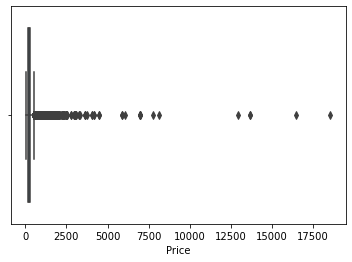

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Person Capacity


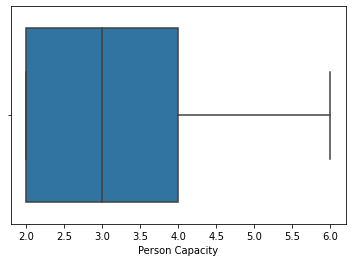

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Multiple Rooms


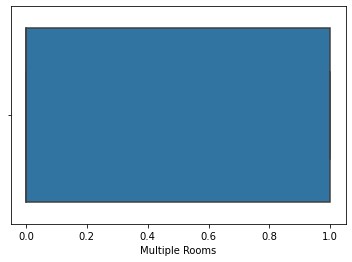

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Business


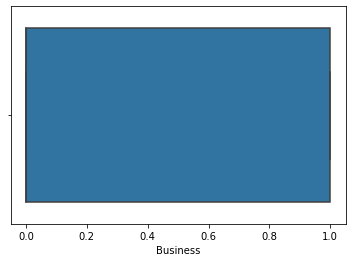

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Cleanliness Rating


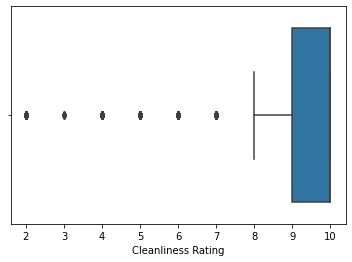

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Guest Satisfaction


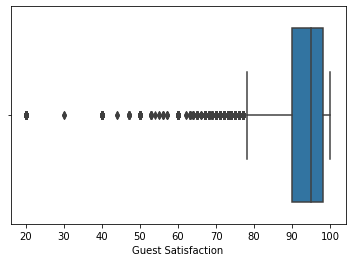

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Bedrooms


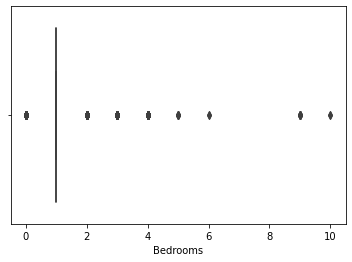

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


City Center (km)


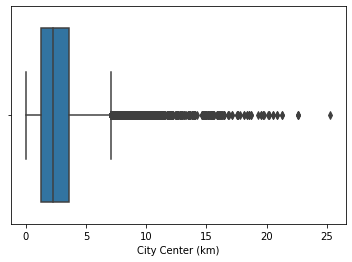

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Metro Distance (km)


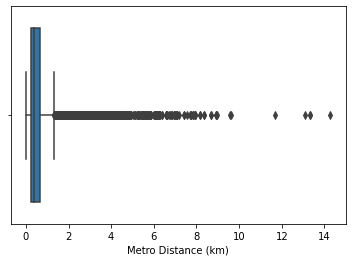

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Attraction Index


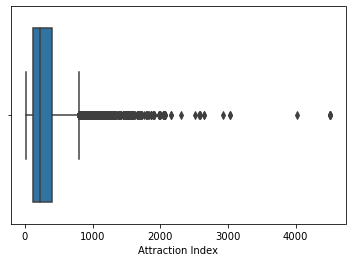

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Normalised Attraction Index


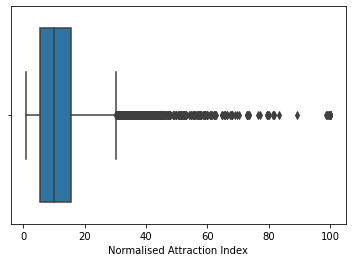

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Restraunt Index


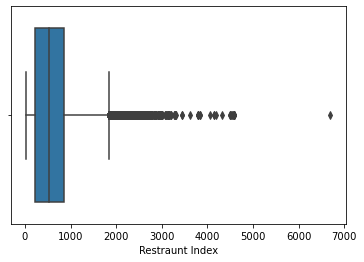

C:\Users\nagan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Normalised Restraunt Index


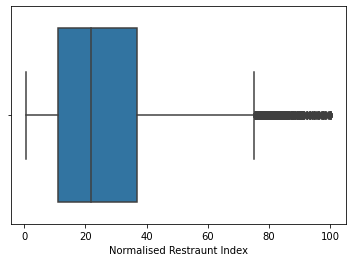

In [7]:
#Checking for Symmetry

for i in df.columns:
    if df[i].dtypes=='float64' or df[i].dtype=='int64':
        sns.boxplot(df[i])
        print(i)
        plt.show()

In [16]:
column_outliers=["Price","City Center (km)","Metro Distance (km)","Attraction Index",
                "Normalised Attraction Index","Restraunt Index","Normalised Restraunt Index"]

In [17]:
for col in column_outliers:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    df=df[(df[col]>=lower_limit)&(df[col]<=upper_limit)]

Text(0, 0.5, 'count')

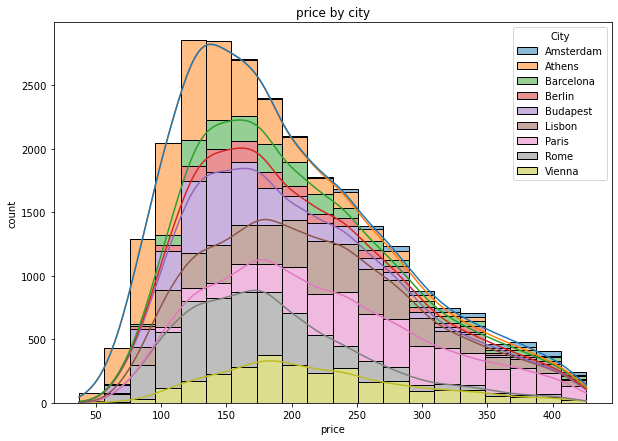

In [21]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Price',hue='City',bins=20,multiple='stack',kde=True)
plt.title('price by city')
plt.xlabel('price')
plt.ylabel('count')

Text(0, 0.5, 'price')

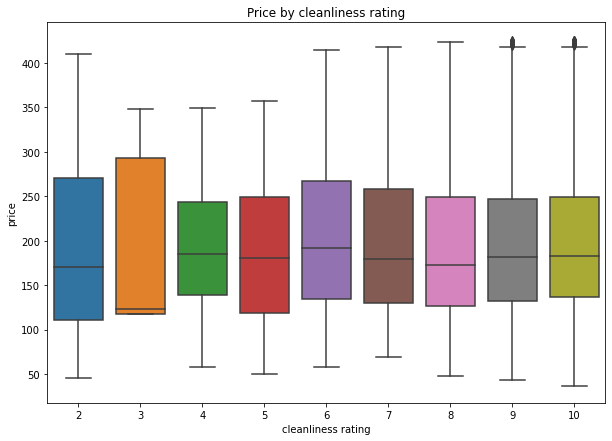

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Cleanliness Rating",y="Price",data=df)

plt.title("Price by cleanliness rating")
plt.xlabel('cleanliness rating')
plt.ylabel('price')

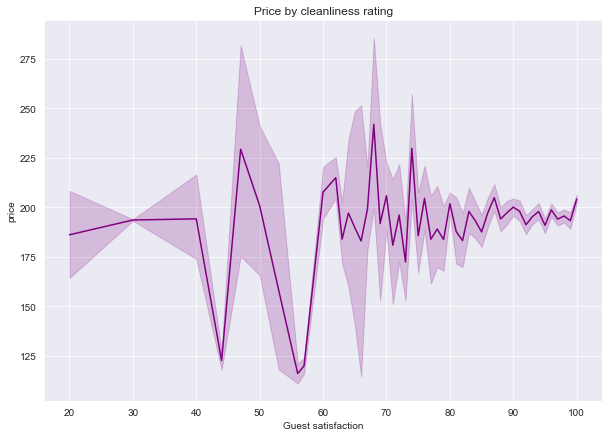

In [27]:
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

sns.lineplot(x="Guest Satisfaction",y="Price",data=df,color='purple')

plt.title("Price by cleanliness rating")
plt.xlabel('Guest satisfaction')
plt.ylabel('price')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [37]:
df['City']=le.fit_transform(df['City'])
df['Day']=le.fit_transform(df['Day'])
df['Room Type']=le.fit_transform(df['Room Type'])
df['Shared Room']=le.fit_transform(df['Shared Room'])
df['Private Room']=le.fit_transform(df['Private Room'])
df['Superhost']=le.fit_transform(df['Superhost'])

<AxesSubplot:>

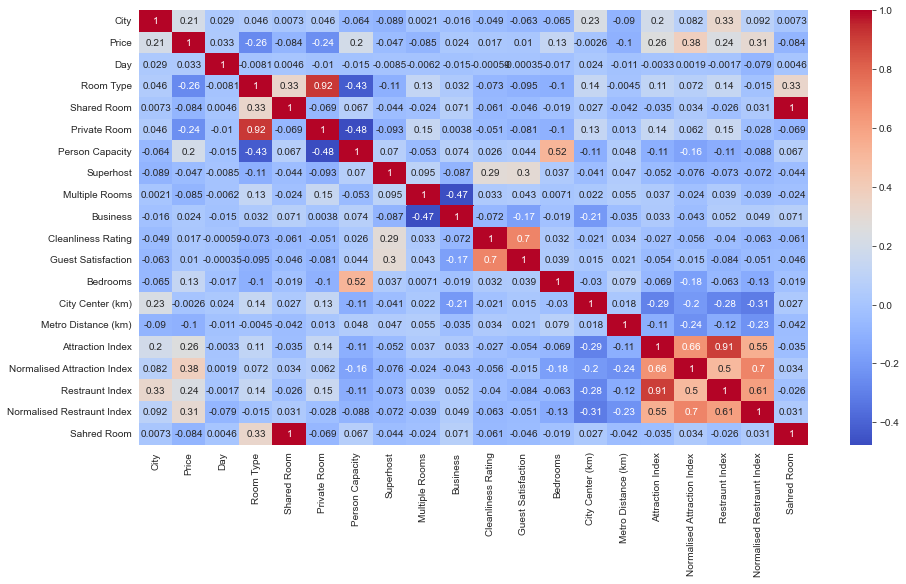

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26776 entries, 6 to 41713
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         26776 non-null  int64  
 1   Price                        26776 non-null  float64
 2   Day                          26776 non-null  int64  
 3   Room Type                    26776 non-null  int64  
 4   Shared Room                  26776 non-null  int64  
 5   Private Room                 26776 non-null  int64  
 6   Person Capacity              26776 non-null  int64  
 7   Superhost                    26776 non-null  int64  
 8   Multiple Rooms               26776 non-null  int64  
 9   Business                     26776 non-null  int64  
 10  Cleanliness Rating           26776 non-null  int64  
 11  Guest Satisfaction           26776 non-null  int64  
 12  Bedrooms                     26776 non-null  int64  
 13  City Center (km)

In [40]:
df.drop('Sahred Room',axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26776 entries, 6 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         26776 non-null  int64  
 1   Price                        26776 non-null  float64
 2   Day                          26776 non-null  int64  
 3   Room Type                    26776 non-null  int64  
 4   Shared Room                  26776 non-null  int64  
 5   Private Room                 26776 non-null  int64  
 6   Person Capacity              26776 non-null  int64  
 7   Superhost                    26776 non-null  int64  
 8   Multiple Rooms               26776 non-null  int64  
 9   Business                     26776 non-null  int64  
 10  Cleanliness Rating           26776 non-null  int64  
 11  Guest Satisfaction           26776 non-null  int64  
 12  Bedrooms                     26776 non-null  int64  
 13  City Center (km)

In [44]:
x=df.drop(columns=['Price'])
y=df['Price']

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [50]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
y_pred=svr.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.39259788628441905

In [57]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)

In [58]:
import math
math.sqrt(mse)

62.30645499341303